Exploracion de datos

In [5]:
# ==========================
# 📌 1. Importar librerías
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configurar estilo de gráficos
sns.set_style("whitegrid")

# ==========================
# 📌 2. Cargar archivo CSV
# ==========================
file_path = "heart_cleveland_upload.csv"
heart_data = pd.read_csv(file_path)

# ==========================
# 📌 3. Información General
# ==========================
print("\n🔹 Información del Dataset:")
print(heart_data.info())

print("\n📌 Primeras 5 filas:")
print(heart_data.head())

print("\n📊 Estadísticas descriptivas:")
print(heart_data.describe())

print("\n🔍 Valores nulos por columna:")
print(heart_data.isnull().sum())



🔹 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

📌 Primeras 5 filas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0

Procesamiento de datos

In [8]:
# ==========================
# 📌 4. Preprocesamiento de datos
# ==========================

# Reemplazar valores nulos con la mediana (si hay valores nulos)
heart_data.fillna(heart_data.median(), inplace=True)

# Codificar variables categóricas si existen
label_encoders = {}
for column in heart_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    heart_data[column] = le.fit_transform(heart_data[column])
    label_encoders[column] = le

# Normalizar las características numéricas
scaler = StandardScaler()
heart_data.iloc[:, :-1] = scaler.fit_transform(heart_data.iloc[:, :-1])

print("\n✅ Preprocesamiento completado")
print(heart_data.head())



✅ Preprocesamiento completado
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.600302  0.691095 -2.240629  1.596266 -0.257179  2.430427  1.010199   
1  1.600302 -1.446980 -2.240629  0.468418 -0.160859 -0.411450 -1.003419   
2  1.268242 -1.446980 -2.240629  1.032342 -0.411292 -0.411450 -1.003419   
3  1.157555  0.691095 -2.240629  0.355633  0.667499  2.430427  1.010199   
4  1.046868  0.691095 -2.240629 -1.223355 -0.700254 -0.411450  1.010199   

    thalach     exang   oldpeak     slope        ca      thal  condition  
0 -0.812095 -0.696419 -0.820813  0.643781  0.344824 -0.874292          0  
1  0.061157 -0.696419  0.639470 -0.976583  1.411625 -0.874292          0  
2 -1.554358 -0.696419  1.326662  2.264145 -0.721976 -0.874292          0  
3  1.065396 -0.696419  0.295874  0.643781  0.344824 -0.874292          1  
4 -0.244481  1.435916  0.639470  0.643781 -0.721976 -0.874292          0  


C:\Users\jaider.beltran\AppData\Local\Temp\ipykernel_27068\1453924876.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.60030243  1.60030243  1.26824154  1.15755458  1.04686761  1.04686761
  0.93618065  0.71480672  0.60411976  0.49343279  0.49343279  0.49343279
  0.49343279  0.38274583  0.1613719  -0.28137595 -0.28137595 -0.39206292
 -1.0561847  -1.38824559 -1.60961952 -1.83099344 -2.2737413   2.15373725
  1.82167636  1.7109894   1.26824154  0.93618065  0.82549369  0.82549369
  0.49343279  0.38274583  0.38274583  0.27205887  0.27205887  0.27205887
  0.1613719   0.1613719   0.1613719   0.1613719   0.05068494  0.05068494
  0.05068494 -0.06000202 -0.06000202 -0.06000202 -0.28137595 -0.28137595
 -0.28137595 -0.50274988 -0.61343684 -0.61343684 -0.72412381 -0.72412381
 -0.94549773 -0.94549773 -1.0561847  -1.0561847  -1.0561847  -1.16687166
 -1.16687166 -1.16687166 -1.38824559 -1.49893255 -1.49893255 -1.49893255
 -

Selección de características relevantes

In [11]:
# ==========================
# 📌 5. Selección de características
# ==========================

# Definir X (variables predictoras) y y (variable objetivo)
X = heart_data.iloc[:, :-1]
y = heart_data.iloc[:, -1]

# Aplicar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=5)  # Seleccionamos las 5 mejores
X_selected = selector.fit_transform(X, y)

# Ver qué características fueron seleccionadas
selected_features = X.columns[selector.get_support()]
print("\n📌 Características seleccionadas:")
print(selected_features)



📌 Características seleccionadas:
Index(['thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


Dividir el dataset en Train y Test

In [14]:
# ==========================
# 📌 6. División del dataset en Train y Test
# ==========================

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("\n✅ División de datos completada")
print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")



✅ División de datos completada
Datos de entrenamiento: (237, 5), Datos de prueba: (60, 5)


Entrenar el modelo con hiperparámetros

In [17]:
# ==========================
# 📌 7. Entrenamiento del modelo
# ==========================

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

print("\n✅ Entrenamiento completado")



✅ Entrenamiento completado


Evaluar el desempeño del modelo

In [20]:
# ==========================
# 📌 8. Evaluación del modelo
# ==========================

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\n✅ Exactitud del modelo: {accuracy:.2f}")
print("\n🔹 Matriz de Confusión:")
print(conf_matrix)
print("\n📊 Reporte de Clasificación:")
print(report)



✅ Exactitud del modelo: 0.77

🔹 Matriz de Confusión:
[[25  7]
 [ 7 21]]

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.75      0.75      0.75        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



Visualizar los resultados

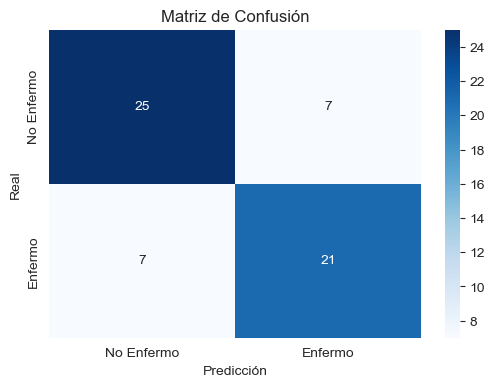

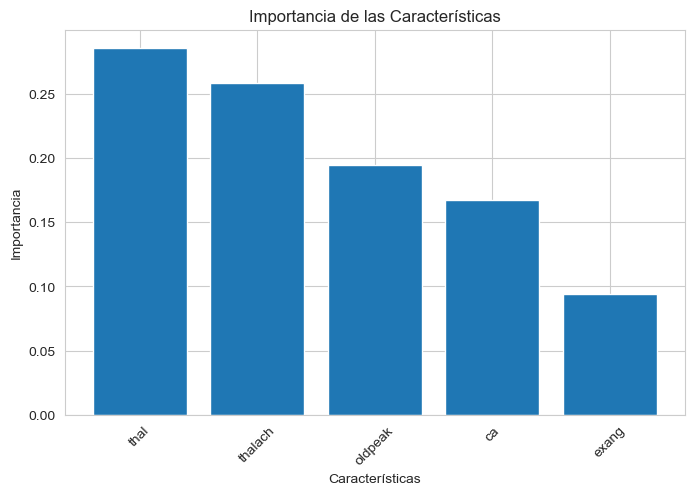

In [23]:
# ==========================
# 📌 9. Visualización de resultados
# ==========================

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Mostrar la importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(len(selected_features)), importances[indices], align="center")
plt.xticks(range(len(selected_features)), selected_features[indices], rotation=45)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características")
plt.show()


Regresion Logistica

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el dataset
file_path = "heart_cleveland_upload.csv"
heart_data = pd.read_csv(file_path)

# Definir X (variables predictoras) e y (variable objetivo)
X = heart_data.iloc[:, :-1]  # Todas las columnas excepto la última
y = heart_data.iloc[:, -1]   # Última columna como variable objetivo

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"✅ Exactitud del modelo: {accuracy:.2f}")
print("\n🔹 Matriz de Confusión:")
print(conf_matrix)
print("\n📊 Reporte de Clasificación:")
print(report)


✅ Exactitud del modelo: 0.73

🔹 Matriz de Confusión:
[[23  9]
 [ 7 21]]

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

